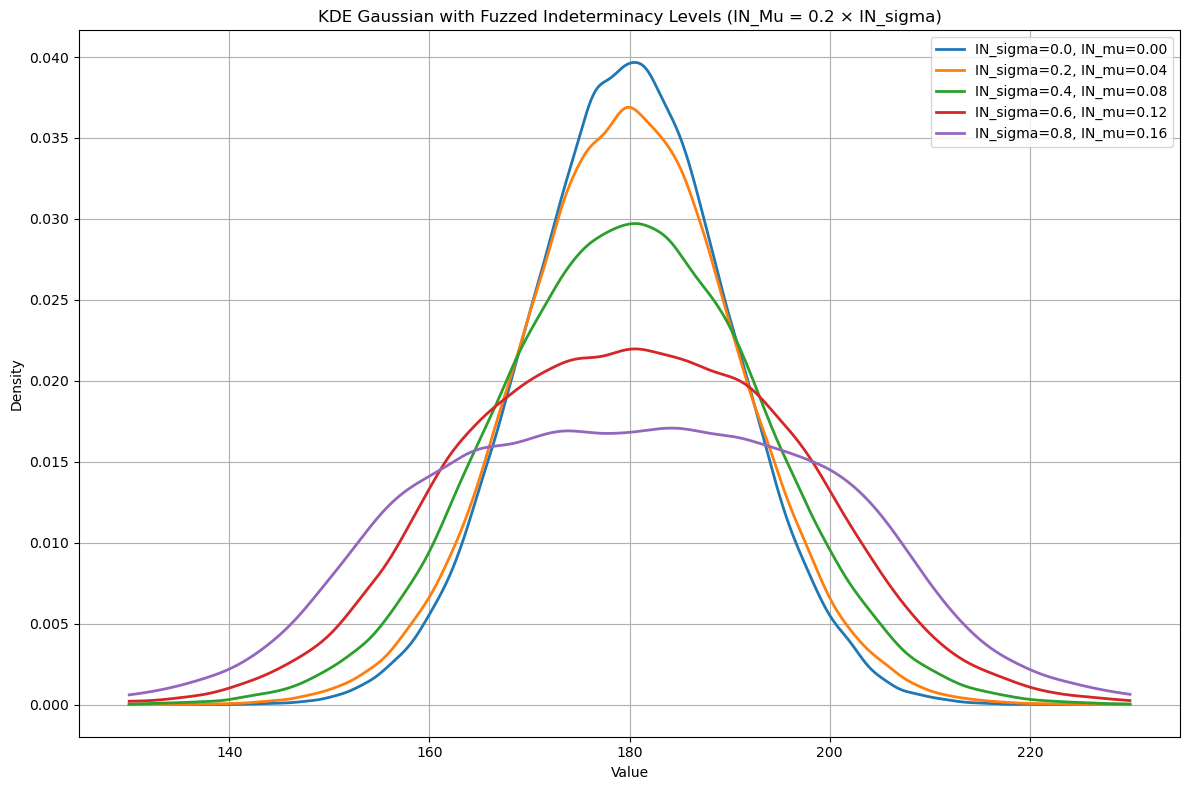

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Hàm sinh dữ liệu Gaussian Neutrosophic dùng phương pháp Box-Muller
def generate_fuzzed_gaussian(mu, sigma, IN_sigma, k, size):
    IN_mu = k * IN_sigma  # Làm mờ mu dựa theo IN_sigma
    data = []

    for _ in range(size // 2):
        # Fuzz hóa mu và sigma
        fuzzed_mu = np.random.uniform(mu - mu * IN_mu, mu + mu * IN_mu)
        fuzzed_sigma = max(1e-6, np.random.uniform(sigma - sigma * IN_sigma, sigma + sigma * IN_sigma))

        # Sinh 2 biến chuẩn bằng Box-Muller
        u1, u2 = np.random.uniform(0, 1, 2)
        z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

        data.append(fuzzed_mu + fuzzed_sigma * z0)
        data.append(fuzzed_mu + fuzzed_sigma * z1)

    return np.array(data[:size])

# Tham số chính
mu, sigma, size = 180, 10, 100000
IN_sigma_levels = [0.0, 0.2, 0.4, 0.6, 0.8]
k = 0.2  # Hệ số fuzz mu dựa trên IN_sigma

# Vẽ biểu đồ KDE
plt.figure(figsize=(12, 8))
x_vals = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)

for IN_sigma in IN_sigma_levels:
    data = generate_fuzzed_gaussian(mu, sigma, IN_sigma, k, size)
    kde = gaussian_kde(data)
    plt.plot(x_vals, kde(x_vals), label=f"IN_sigma={IN_sigma}, IN_mu={k * IN_sigma:.2f}", linewidth=2)

plt.title("KDE Gaussian with Fuzzed Indeterminacy Levels (IN_Mu = 0.2 × IN_sigma)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, kstest

# Hàm sinh dữ liệu Gaussian có fuzz mu và sigma
def generate_fuzzed_gaussian(mu, sigma, k, IN_sigma, size):
    IN_mu = k * IN_sigma  # Tỉ lệ fuzz cho mu
    data = []
    for _ in range(size // 2):
        fuzzed_mu = np.random.uniform(mu - mu * IN_mu, mu + mu * IN_mu)
        fuzzed_sigma = max(0.1, np.random.uniform(sigma - sigma * IN_sigma, sigma + sigma * IN_sigma))
        u1, u2 = np.random.uniform(0, 1, 2)
        z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
        data.append(fuzzed_mu + fuzzed_sigma * z0)
        data.append(fuzzed_mu + fuzzed_sigma * z1)
    return np.array(data[:size])

# Hàm thống kê mô tả + kiểm định KS
def summarize(data, label, ref_mu, ref_sigma):
    return {
        "type": label,
        "mean": np.mean(data),
        "std": np.std(data),
        "skew": skew(data),
        "kurtosis": kurtosis(data),
        "ks_pvalue": kstest(data, 'norm', args=(ref_mu, ref_sigma)).pvalue
    }

# Tham số đầu vào
mu, sigma, size = 180, 10, 100000
k = 0.2
IN_sigma_levels = [0.0, 0.2, 0.4, 0.6, 0.8]

# Thực hiện sinh và tổng hợp dữ liệu
summary = []
for IN in IN_sigma_levels:
    data = generate_fuzzed_gaussian(mu, sigma, k, IN, size)
    label = f"IN={IN}"
    summary.append(summarize(data, label, mu, sigma))

# In kết quả
df = pd.DataFrame(summary)
print(df.to_string(index=False))


  type       mean       std      skew  kurtosis    ks_pvalue
IN=0.0 180.003937  9.995178 -0.012250  0.010235 8.466042e-01
IN=0.2 179.999294 10.853308 -0.015485  0.083394 1.209807e-32
IN=0.4 179.944272 13.226581 -0.003605  0.017039 0.000000e+00
IN=0.6 179.965042 16.406053  0.000714 -0.177986 0.000000e+00
IN=0.8 179.909331 19.947210 -0.008563 -0.413759 0.000000e+00
